# Tutorial: Coding the Agent to Learn from Atari

In this notebook, we will code out the atari wrappers following this [paper](https://www.nature.com/articles/nature14236).


In [ ]:
# You might need to install these if you haven;t already
'''
!pip install torch
!pip install torchvision
!pip install numpy
!pip install matplotlib
!pip install gym
!pip install box2d-py
!pip install atari-py
'''

# Random Action Episodes

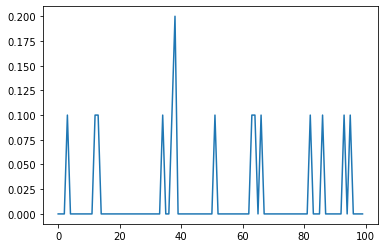

In [1]:
## Random Guessing (No Learning)
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')

n_games = 1000
win_pct = []
scores = []
for i in range(n_games):
    done = False
    obs = env.reset()
    score = 0
    while not done:
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        score += reward
    scores.append(score)

    if i % 10 == 0:
        average = np.mean(scores[-10:])
        win_pct.append(average)
plt.plot(win_pct)

# Simple Q-Larning

episode 0 win_pct 0.00 epsilon 1.00
episode 1000 win_pct 0.02 epsilon 1.00
episode 2000 win_pct 0.02 epsilon 0.99
episode 3000 win_pct 0.02 epsilon 0.99
episode 4000 win_pct 0.00 epsilon 0.98
episode 5000 win_pct 0.01 epsilon 0.98
episode 6000 win_pct 0.00 epsilon 0.98
episode 7000 win_pct 0.04 epsilon 0.97
episode 8000 win_pct 0.00 epsilon 0.97
episode 9000 win_pct 0.00 epsilon 0.97
episode 10000 win_pct 0.03 epsilon 0.96
episode 11000 win_pct 0.00 epsilon 0.96
episode 12000 win_pct 0.00 epsilon 0.95
episode 13000 win_pct 0.02 epsilon 0.95
episode 14000 win_pct 0.02 epsilon 0.95
episode 15000 win_pct 0.01 epsilon 0.94
episode 16000 win_pct 0.01 epsilon 0.94
episode 17000 win_pct 0.02 epsilon 0.94
episode 18000 win_pct 0.08 epsilon 0.93
episode 19000 win_pct 0.02 epsilon 0.93
episode 20000 win_pct 0.00 epsilon 0.93
episode 21000 win_pct 0.01 epsilon 0.92
episode 22000 win_pct 0.02 epsilon 0.92
episode 23000 win_pct 0.04 epsilon 0.91
episode 24000 win_pct 0.04 epsilon 0.91
episode 25000

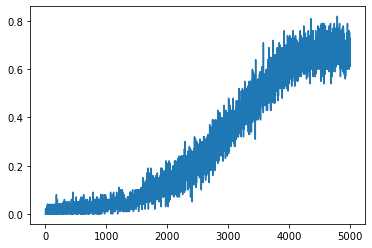

In [2]:
## Q Learning
import numpy as np

class Agent():
    def __init__ (self, lr, gamma, n_actions, n_states, eps_start, eps_end, eps_dec):
        self.lr = lr
        self.gamma = gamma
        self.n_actions = n_actions
        self.n_states = n_states
        self.epsilon = eps_start
        self.eps_min = eps_end
        self.eps_dec = eps_dec

        self.Q = {}

        self.init_Q()

    def init_Q(self):
        for state in range(self.n_states):
            for action in range(self.n_actions):
                self.Q[(state, action)] = 0.0
    def choose_action(self, state):
        if np.random.random() < self.epsilon:
            action = np.random.choice([i for i in range(self.n_actions)])
        else:
            actions = np.array([self.Q[(state, a)] for a in range(self.n_actions)])
            action = np.argmax(actions)
        return action

    def decrement_epsilon(self):
        self.epsilon = self.epsilon*self.eps_dec if self.epsilon > self.eps_min else self.eps_min
    
    def learn(self, state, action, reward, state_):
        actions = np.array([self.Q[(state_, a)] for a in range(self.n_actions)])
        a_max = np.argmax(actions)

        self.Q[(state, action)] += self.lr * (reward + self.gamma * self.Q[(state_, a_max)] - self.Q[(state, action)])
        self.decrement_epsilon()

import gym
import matplotlib.pyplot as plt
import numpy as np

env = gym.make('FrozenLake-v0')
agent = Agent(lr = 0.001, gamma = 0.9, eps_start = 1.0, eps_end = 0.01, eps_dec = 0.9999995, n_actions = 4, n_states = 16)

scores = []
win_pct_lst = []
n_games = 500000

for i in range(n_games):
    done = False
    observation = env.reset()
    score = 0
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        agent.learn(observation, action, reward, observation_)
        score += reward
        observation = observation_
    scores.append(score)
    if i % 100 == 0:
        win_pct = np.mean(scores[-100:])
        win_pct_lst.append(win_pct)
        if i % 1000 == 0:
            print('episode', i, 'win_pct %.2f' % win_pct, 'epsilon %.2f' % agent.epsilon)
plt.plot(win_pct_lst)

# Simple DQN

My Device:  cuda:0
episode 0 score 18.0 Avg_score 18.0 epsilon 1.00
episode 100 score 14.0 Avg_score 22.2 epsilon 0.98
episode 200 score 38.0 Avg_score 22.2 epsilon 0.96
episode 300 score 12.0 Avg_score 20.8 epsilon 0.93
episode 400 score 24.0 Avg_score 21.8 epsilon 0.91
episode 500 score 27.0 Avg_score 22.1 epsilon 0.89
episode 600 score 9.0 Avg_score 21.7 epsilon 0.87
episode 700 score 12.0 Avg_score 22.6 epsilon 0.85
episode 800 score 17.0 Avg_score 22.9 epsilon 0.82
episode 900 score 25.0 Avg_score 22.3 epsilon 0.80
episode 1000 score 11.0 Avg_score 22.5 epsilon 0.78
episode 1100 score 24.0 Avg_score 23.8 epsilon 0.76
episode 1200 score 54.0 Avg_score 23.7 epsilon 0.73
episode 1300 score 41.0 Avg_score 28.9 epsilon 0.70
episode 1400 score 34.0 Avg_score 23.6 epsilon 0.68
episode 1500 score 10.0 Avg_score 22.7 epsilon 0.66
episode 1600 score 29.0 Avg_score 27.1 epsilon 0.63
episode 1700 score 24.0 Avg_score 30.6 epsilon 0.60
episode 1800 score 13.0 Avg_score 26.9 epsilon 0.57
episod

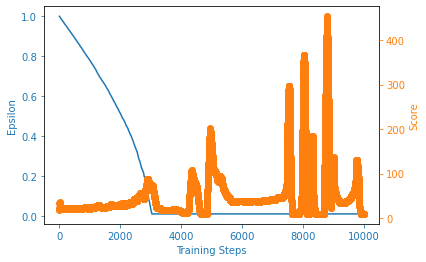

In [3]:
## DQN
import gym
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch as T
import matplotlib.pyplot as plt

class LinearDeepQNetwork(nn.Module):
    def __init__ (self, lr, n_actions, input_dims):
        super(LinearDeepQNetwork, self).__init__()

        self.fc1 = nn.Linear(*input_dims, 128)
        self.fc2 = nn.Linear(128, n_actions)

        self.optimizer = optim.Adam(self.parameters(), lr = lr)
        self.loss = nn.MSELoss()
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        print("My Device: ", self.device)
        self.to(self.device)
    
    def forward(self, state):
        layer1 = F.relu(self.fc1(state))
        actions = self.fc2(layer1)

        return actions
    
class Agent():
    def __init__ (self, input_dims, n_actions, lr = 0.0001, gamma = 0.99, epsilon = 1.0, eps_dec = 1e-5, eps_min = 0.01):
        self.lr = lr
        self.input_dims = input_dims
        self.n_actions = n_actions
        self.gamma = gamma
        self.epsilon = epsilon
        self.eps_dec = eps_dec
        self.eps_min = eps_min
        self.action_space = [i for i in range(self.n_actions)]

        self.Q = LinearDeepQNetwork(self.lr, self.n_actions, self.input_dims)

    def choose_action(self, observation):
        if np.random.random() > self.epsilon:
            state = T.tensor(observation, dtype = T.float).to(self.Q.device)
            actions = self.Q.forward(state)
            action = T.argmax(actions).item()
        else:
            action = np.random.choice(self.action_space)
        return action

    def decrement_epsilon(self):
        self.epsilon = self.epsilon - self.eps_dec if self.epsilon > self.eps_min else self.eps_min
    
    def learn(self, state, action, reward, state_):
        self.Q.optimizer.zero_grad()
        states = T.tensor(state, dtype = T.float).to(self.Q.device)
        actions = T.tensor(action).to(self.Q.device)
        rewards = T.tensor(reward).to(self.Q.device)
        states_ = T.tensor(state_, dtype = T.float).to(self.Q.device)

        q_pred = self.Q.forward(states)[actions]

        q_next = self.Q.forward(states_).max()

        q_target = reward + self.gamma*q_next

        loss = self.Q.loss(q_target, q_pred).to(self.Q.device)
        loss.backward()
        self.Q.optimizer.step()
        self.decrement_epsilon()

env = gym.make('CartPole-v1')
n_games = 10000
scores = []
eps_history = []

agent = Agent(
    input_dims = env.observation_space.shape,
    n_actions = env.action_space.n
    )
for i in range(n_games):
    score = 0
    done = False
    obs = env.reset()

    while not done:
        action = agent.choose_action(obs)
        obs_, reward, done, info = env.step(action)
        score += reward
        agent.learn(obs, action, reward, obs_)
        obs = obs_
    scores.append(score)
    eps_history.append(agent.epsilon)

    if i % 100 == 0:
        avg_score = np.mean(scores[-100:])
        print('episode', i, 'score %.1f Avg_score %.1f epsilon %.2f'%(score, avg_score, agent.epsilon))

def plot_learning_curve(x, scores, epsilons):
    fig = plt.figure()
    ax = fig.add_subplot(111, label = "1")
    ax2 = fig.add_subplot(111, label = "2", frame_on = False)

    ax.plot(x, epsilons, color = "C0")
    ax.set_xlabel("Training Steps", color = "C0")
    ax.set_ylabel("Epsilon", color = "C0")
    ax.tick_params(axis = 'x', colors = "C0")
    ax.tick_params(axis = 'y', colors = "C0")

    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
        running_avg[t] = np.mean(scores[max(0, t-100):(t+1)])

    ax2.scatter(x, running_avg, color = "C1")
    ax2.axes.get_xaxis().set_visible(False)
    ax2.yaxis.tick_right()
    ax2.set_ylabel('Score', color = "C1")
    ax2.yaxis.set_label_position('right')
    ax2.tick_params(axis = 'y', colors = "C1")
x = [i+1 for i in range(n_games)]
plot_learning_curve(x, scores, eps_history)

# Import atari ROMs

In [1]:
%cd ..

d:\Github\Reinforcement_Learning


In [2]:
!python -m atari_py.import_roms ROMS/ROMS/

copying adventure.bin from ROMS/ROMS/ROMS\Adventure (1980) (Atari, Warren Robinett) (CX2613, CX2613P) (PAL).bin to C:\Users\sarth\.conda\envs\master\lib\site-packages\atari_py\atari_roms\adventure.bin
copying air_raid.bin from ROMS/ROMS/ROMS\Air Raid (Men-A-Vision) (PAL) ~.bin to C:\Users\sarth\.conda\envs\master\lib\site-packages\atari_py\atari_roms\air_raid.bin
copying alien.bin from ROMS/ROMS/ROMS\Alien (1982) (20th Century Fox Video Games, Douglas 'Dallas North' Neubauer) (11006) ~.bin to C:\Users\sarth\.conda\envs\master\lib\site-packages\atari_py\atari_roms\alien.bin
copying amidar.bin from ROMS/ROMS/ROMS\Amidar (1982) (Parker Brothers, Ed Temple) (PB5310) ~.bin to C:\Users\sarth\.conda\envs\master\lib\site-packages\atari_py\atari_roms\amidar.bin
copying assault.bin from ROMS/ROMS/ROMS\Assault (AKA Sky Alien) (1983) (Bomb - Onbase) (CA281).bin to C:\Users\sarth\.conda\envs\master\lib\site-packages\atari_py\atari_roms\assault.bin
copying asterix.bin from ROMS/ROMS/ROMS\Asterix (AK

In [3]:
%cd Sections/

d:\Github\Reinforcement_Learning\Sections


# DQN with all preprocessing

In [4]:
## DQN with all Preprocessing
import os
import gym
import numpy as np
import matplotlib.pyplot as plt
import collections
import cv2

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch as T

#############################################################################
#############################################################################
class ReplayBuffer():
    def __init__(self, max_size, input_shape, n_actions):
        self.mem_size = max_size
        self.mem_cntr = 0
        self.state_memory = np.zeros((self.mem_size, *input_shape), dtype = np.float32)
        self.new_state_memory = np.zeros((self.mem_size, *input_shape), dtype = np.float32)
        self.action_memory = np.zeros(self.mem_size, dtype = np.int64)
        self.reward_memory = np.zeros(self.mem_size, dtype = np.float32)
        self.terminal_memory = np.zeros(self.mem_size, dtype = np.uint8)

    def store_transition(self, state, action, reward, state_, done):
        index = self.mem_cntr % self.mem_size
        self.state_memory[index] = state
        self.action_memory[index] = action
        self.reward_memory[index] = reward
        self.new_state_memory[index] = state_
        self.terminal_memory[index] = done
        
        self.mem_cntr += 1

    def sample_buffer(self, batch_size):
        max_mem = min(self.mem_cntr, self.mem_size)
        batch = np.random.choice(max_mem, batch_size, replace = False)

        states = self.state_memory[batch]
        actions = self.action_memory[batch]
        rewards = self.reward_memory[batch]
        states_ = self.new_state_memory[batch]
        dones = self.terminal_memory[batch]

        return states, actions, rewards, states_, dones

#############################################################################
#############################################################################
def plot_learning_curve(x, scores, epsilons):
    fig = plt.figure()
    ax = fig.add_subplot(111, label = "1")
    ax2 = fig.add_subplot(111, label = "2", frame_on = False)

    ax.plot(x, epsilons, color = "C0")
    ax.set_xlabel("Training Steps", color = "C0")
    ax.set_ylabel("Epsilon", color = "C0")
    ax.tick_params(axis = 'x', colors = "C0")
    ax.tick_params(axis = 'y', colors = "C0")

    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
        running_avg[t] = np.mean(scores[max(0, t-100):(t+1)])

    ax2.scatter(x, running_avg, color = "C1")
    ax2.axes.get_xaxis().set_visible(False)
    ax2.yaxis.tick_right()
    ax2.set_ylabel('Score', color = "C1")
    ax2.yaxis.set_label_position('right')
    ax2.tick_params(axis = 'y', colors = "C1")

class RepeatActionAndMaxFrame(gym.Wrapper):
    def __init__ (self, env = None, repeat = 4, clip_rewards = False, no_ops = 0.0, fire_first = False):
        super(RepeatActionAndMaxFrame, self).__init__(env)
        self.repeat = repeat
        self.shape = env.observation_space.low.shape
        self.frame_buffer = np.zeros_like((2, self.shape))

        self.clip_reward = clip_rewards
        self.no_ops = no_ops
        self.fire_first = fire_first

    def step(self, action):
        t_reward = 0.0
        done = False
        for i in range(self.repeat):
            obs, reward, done, info = self.env.step(action)
            if self.clip_reward:
                reward = np.clip(np.array([reward]), -1, 1)[0]
            t_reward += reward
            idx = i % 2
            self.frame_buffer[idx] = obs
            if done:
                break
        
        max_frame = np.maximum(self.frame_buffer[0], self.frame_buffer[1])
        return max_frame, t_reward, done, info

    def reset(self):
        obs = self.env.reset()

        no_ops = np.random.randint(self.no_ops) + 1 if self.no_ops > 0 else 0
        for _ in range(no_ops):
            _, _, done, _ = self.env.step(0)
            if done:
                self.env.reset()
        if self.fire_first:
            assert self.env.unwrapped.get_action_meanings()[1] == 'FIRE'
            obs, _, _, _ = self.env.step(1)

        self.frame_buffer = np.zeros_like((2, self.shape))
        self.frame_buffer[0] = obs

        return obs

class PreprocessFrame(gym.ObservationWrapper):
    def __init__ (self, shape, env = None):
        super(PreprocessFrame, self).__init__(env)
        self.shape = (shape[2], shape[0], shape[1])
        self.observation_space = gym.spaces.Box(low = 0.0, high = 1.0, shape = self.shape, dtype = np.float32)

    def observation(self, obs):
        new_frame = cv2.cvtColor(obs, cv2.COLOR_RGB2GRAY)
        resized_screen = cv2.resize(new_frame, self.shape[1:], interpolation = cv2.INTER_AREA)
        new_obs = np.array(resized_screen, dtype = np.uint8).reshape(self.shape)
        new_obs = new_obs / 255.0

        return new_obs

class StackFrames(gym.ObservationWrapper):
    def __init__(self, env, repeat):
        super(StackFrames, self).__init__(env)
        self.observation_space = gym.spaces.Box(
            env.observation_space.low.repeat(repeat, axis = 0),
            env.observation_space.high.repeat(repeat, axis = 0),
            dtype = np.float32)
        self.stack = collections.deque(maxlen = repeat)

    def reset(self):
        self.stack.clear()
        observation = self.env.reset()
        for _ in range(self.stack.maxlen):
            self.stack.append(observation)
        
        return np.array(self.stack).reshape(self.observation_space.low.shape)
    
    def observation(self, observation):
        self.stack.append(observation)
        return np.array(self.stack).reshape(self.observation_space.low.shape)

def make_env(env_name, shape = (84,84,1), repeat = 4, clip_rewards = False, no_ops = 0, fire_first = False):
    env = gym.make(env_name)
    env = RepeatActionAndMaxFrame(env, repeat, clip_rewards, no_ops, fire_first)
    env = PreprocessFrame(shape, env)
    env = StackFrames(env, repeat)
    return env
#############################################################################
#############################################################################

class DeepQNetwork(nn.Module):
    def __init__ (self, lr, n_actions, name, input_dims, chkpt_dir):
        super(DeepQNetwork, self).__init__()
        self.checkpoint_dir = chkpt_dir
        self.checkpoint_file = os.path.join(self.checkpoint_dir, name)

        self.conv1 = nn.Conv2d(input_dims[0], 32, 8, stride = 4)
        self.conv2 = nn.Conv2d(32, 64, 4, stride = 2)
        self.conv3 = nn.Conv2d(64, 64, 3, stride = 1)

        fc_input_dims = self.calculate_conv_output_dims(input_dims)

        self.fc1 = nn.Linear(fc_input_dims, 512)
        self.fc2 = nn.Linear(512, n_actions)

        self.optimizer = optim.RMSprop(self.parameters(), lr = lr)
        self.loss = nn.MSELoss()
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        print("My Device: ", self.device)
        self.to(self.device)
    
    def calculate_conv_output_dims(self, input_dims):
        state = T.zeros(1, *input_dims)
        dims = self.conv1(state)
        dims = self.conv2(dims)
        dims = self.conv3(dims)
        return int(np.prod(dims.size()))
    
    def forward(self, state):
        conv1 = F.relu(self.conv1(state))
        conv2 = F.relu(self.conv2(conv1))
        conv3 = F.relu(self.conv3(conv2)) 
        # Shape is BS x n_Filters x H x W
        conv_state = conv3.view(conv3.size()[0], -1)
        flat1 = F.relu(self.fc1(conv_state))
        actions = self.fc2(flat1)

        return actions
    
    def save_checkpoint(self):
        print('...Saving Checkpoint...')
        T.save(self.state_dict(), self.checkpoint_file)
    
    def load_checkpoint(self):
        print('...Loading Checkpoint...')
        self.load_state_dict(T.load(self.checkpoint_file))
 
class DQNAgent():
    def __init__ (self, gamma, epsilon, lr, n_actions, 
                  input_dims, mem_size, batch_size, 
                  eps_min = 0.01, eps_dec = 5e-7, 
                  replace = 1000, algo = None, 
                  env_name = None, chkpt_dir = 'tmp/dqn'):
        self.gamma = gamma
        self.epsilon = epsilon
        self.lr = lr
        self.n_actions = n_actions
        self.input_dims = input_dims
        self.batch_size = batch_size
        self.eps_min = eps_min
        self.eps_dec = eps_dec
        self.replace_target_cnt = replace
        self.algo = algo
        self.env_name = env_name
        self.chkpt_dir = chkpt_dir
        self.action_space = [i for i in range(self.n_actions)]
        self.learn_step_counter = 0

        self.memory = ReplayBuffer(mem_size, input_dims, n_actions)

        self.q_eval = DeepQNetwork(self.lr, self.n_actions, 
                                   input_dims = self.input_dims,
                                   name = self.env_name + '_' + self.algo + '_q_eval',
                                   chkpt_dir = self.chkpt_dir)
        self.q_next = DeepQNetwork(self.lr, self.n_actions, 
                                   input_dims = self.input_dims,
                                   name = self.env_name + '_' + self.algo + '_q_next',
                                   chkpt_dir = self.chkpt_dir)

    def choose_action(self, observation):
        if np.random.random() > self.epsilon:
            state = T.tensor([observation], dtype = T.float).to(self.q_eval.device)
            actions = self.q_eval.forward(state)
            action = T.argmax(actions).item()
        else:
            action = np.random.choice(self.action_space)
        return action

    def store_transition(self, state, action, reward, state_, done):
        self.memory.store_transition(state, action, reward, state_, done)

    def sample_memory(self):
        state, action, reward, new_state, done = self.memory.sample_buffer(self.batch_size)

        states = T.tensor(state).to(self.q_eval.device)
        rewards = T.tensor(reward).to(self.q_eval.device)
        dones = T.tensor(done).to(self.q_eval.device)
        actions = T.tensor(action).to(self.q_eval.device)
        states_ = T.tensor(new_state).to(self.q_eval.device)

        return states, actions, rewards, states_, dones

    def replace_target_network(self):
        if self.learn_step_counter % self.replace_target_cnt == 0:
            self.q_next.load_state_dict(self.q_eval.state_dict())

    def decrement_epsilon(self):
        self.epsilon = self.epsilon - self.eps_dec if self.epsilon > self.eps_min else self.eps_min

    def save_models(self):
        self.q_eval.save_checkpoint()
        self.q_next.save_checkpoint()

    def load_models(self):
        self.q_eval.load_checkpoint()
        self.q_next.load_checkpoint()
    
    def learn(self, state, action, reward, state_):
        if self.memory.mem_cntr < self.batch_size:
            return
        self.q_eval.optimizer.zero_grad()
        self.replace_target_network()
        states, actions, rewards, states_, dones = self.sample_memory()
        indices = np.arange(self.batch_size)
        q_pred = self.q_eval.forward(states)[indices, actions]
        q_next = self.q_next.forward(states_).max(dim = 1)[0]
        q_next[dones] = 0.0
        q_target = rewards + self.gamma*q_next

        loss = self.q_eval.loss(q_target, q_pred).to(self.q_eval.device)
        loss.backward()
        self.q_eval.optimizer.step()
        self.learn_step_counter += 1
        self.decrement_epsilon()
#############################################################################
#############################################################################

env = make_env('PongNoFrameskip-v4')
best_score = -np.inf
load_checkpoint = False
n_games = 100

agent = DQNAgent(
    gamma = 0.99,
    epsilon = 1.0,
    lr = 0.0001,
    input_dims = (env.observation_space.shape),
    n_actions = env.action_space.n,
    mem_size = 10000,
    eps_min = 0.1,
    batch_size = 32,
    replace = 1000,
    eps_dec = 1e-5,
    chkpt_dir = 'models/',
    algo = 'DQNAgent',
    env_name = 'PongNoFrameskip-v4'
    )
if load_checkpoint:
    agent.load_models()

fname = agent.algo + '_' + agent.env_name + '_lr' + str(agent.lr) + '_' + str(n_games) + '_games'
figure_file = 'plots/' + fname + '.png'

n_steps = 0
scores, eps_history, steps_array = [], [], []

for i in range(n_games):
    done = False
    score = 0
    observation = env.reset()

    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        score += reward

        if not load_checkpoint:
            agent.store_transition(observation, action, reward, observation_, int(done))
            agent.learn(observation, action, reward, observation_)
        observation = observation_
        n_steps += 1
    scores.append(score)
    steps_array.append(n_steps)
    avg_score = np.mean(scores[-100:])
    print('episode', i, 'score %.1f Avg_Score %.1f Best_Score %.1f epsilon %.2f'%(score, avg_score, best_score, agent.epsilon), 'steps ', n_steps)

    if avg_score > best_score:
        if not load_checkpoint:
            agent.save_models()
        best_score = avg_score
    
    eps_history.append(agent.epsilon)

plot_learning_curve(steps_array, scores, eps_history)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


My Device:  cuda:0
My Device:  cuda:0


ipykernel_launcher:287: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)


episode 0 score -21.0 Avg_Score -21.0 Best_Score -inf epsilon 0.99 steps  812
...Saving Checkpoint...
...Saving Checkpoint...
episode 1 score -21.0 Avg_Score -21.0 Best_Score -21.0 epsilon 0.98 steps  1784
episode 2 score -20.0 Avg_Score -20.7 Best_Score -21.0 epsilon 0.97 steps  2788
...Saving Checkpoint...
...Saving Checkpoint...
episode 3 score -20.0 Avg_Score -20.5 Best_Score -20.7 epsilon 0.96 steps  3982
...Saving Checkpoint...
...Saving Checkpoint...
episode 4 score -21.0 Avg_Score -20.6 Best_Score -20.5 epsilon 0.95 steps  4802
episode 5 score -21.0 Avg_Score -20.7 Best_Score -20.5 epsilon 0.94 steps  5585
episode 6 score -21.0 Avg_Score -20.7 Best_Score -20.5 epsilon 0.94 steps  6438
episode 7 score -20.0 Avg_Score -20.6 Best_Score -20.5 epsilon 0.93 steps  7342
episode 8 score -21.0 Avg_Score -20.7 Best_Score -20.5 epsilon 0.92 steps  8168
episode 9 score -20.0 Avg_Score -20.6 Best_Score -20.5 epsilon 0.91 steps  9190
episode 10 score -21.0 Avg_Score -20.6 Best_Score -20.5 ep


```{figure} Images/rl_DQN_score_plot.png
---
width: 60%
align: center
name: rl_DQN_score
---
DQN score with all preprocessing done
```


<strong>
There are ways using which the above performance can be improved. I'll list some of them as a personal exercise,

1. Tune the hyperparameters.
2. Using other exploration policies.
3. Vectorizing environment.
4. Implement the following,
    1. Double DQN
    2. Dueling DQN
    3. Dueling Double DQN

</strong>